In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
df = pd.read_csv("creditcard.csv")  # read data
df.head()  # print first 5 rows of data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Class = 0 (no fraud) and Class = 1 (fraud)

In [18]:
# pourcentage of fraud and normal transaction
fraud = df[df['Class'] == 1]
not_fraud = df[df['Class'] == 0]

fraud_percentage = (len(fraud) / len(df)) * 100
not_fraud_percentage = (len(not_fraud) / len(df)) * 100

print('Fraudulent transactions length: ', len(fraud))

print('Fraudulent transactions: ', fraud_percentage, '%')
print('Normal transactions: ', not_fraud_percentage, '%')

Fraudulent transactions length:  492
Fraudulent transactions:  0.1727485630620034 %
Normal transactions:  99.82725143693798 %


In [19]:
# gather fraud and normal transactions in balanced data
fraud = fraud.sample(400)
not_fraud = not_fraud.sample(400)

data = pd.concat([fraud, not_fraud])
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
149587,91524.0,1.954852,1.630056,-4.337200,2.378367,2.113348,-1.583851,0.653745,-0.192892,1.217608,...,-0.474437,-0.974625,-0.048155,-0.023524,0.362192,-0.570709,0.025619,0.081880,1.00,1
157918,110617.0,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,-0.193244,...,-0.412526,-0.208823,0.344833,1.091435,-0.686513,0.075809,0.033865,-0.832855,635.10,1
83297,59777.0,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,...,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,319.20,1
46918,42988.0,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1
149145,90676.0,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,...,10.005998,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,6.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39408,39823.0,0.982322,-0.483942,0.827038,1.534916,-0.571377,0.934572,-0.510079,0.358019,1.134922,...,-0.404003,-0.964788,-0.123732,-0.514747,0.528424,-0.511521,0.050855,0.026166,91.00,0
36481,38557.0,0.813892,1.129901,-0.174065,2.338580,0.664765,-0.163611,0.768956,-0.262395,-1.097348,...,0.045506,0.189892,0.127636,-0.436929,-0.609048,-0.084267,-0.171243,-0.139757,23.43,0
138164,82515.0,-0.228162,0.726999,1.392962,-0.710395,0.750302,-0.190966,0.859682,-0.171063,-0.553046,...,-0.235030,-0.605131,-0.175267,-0.503104,-0.055543,-0.050246,-0.200309,-0.234551,1.98,0
271763,164733.0,1.996990,-0.551945,-0.478243,0.006265,-0.208285,0.850785,-1.012687,0.338905,1.382883,...,0.053910,0.269143,0.157426,-0.365355,-0.260364,-0.396507,0.046805,-0.039425,10.54,0


In [20]:
data = data.sample(frac=1)  # shuffle data
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
151196,94952.0,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,...,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,571.48,1
261056,159844.0,-0.408111,3.132944,-3.098030,5.803893,0.890609,-0.501474,-0.440054,0.591828,-3.267693,...,0.098482,-0.538375,-0.217989,-1.042657,0.314389,0.543244,0.233851,0.119603,45.51,1
190643,128920.0,1.977721,-0.893089,-0.633510,1.014506,-0.925066,-0.256611,-0.639045,-0.073114,0.268923,...,-0.087967,0.572181,-0.050586,-0.013672,0.309822,-0.243981,0.062684,-0.039671,50.00,0
39408,39823.0,0.982322,-0.483942,0.827038,1.534916,-0.571377,0.934572,-0.510079,0.358019,1.134922,...,-0.404003,-0.964788,-0.123732,-0.514747,0.528424,-0.511521,0.050855,0.026166,91.00,0
75511,56098.0,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,170.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24004,33018.0,1.154115,-1.092699,0.882329,-0.490792,-1.495467,-0.232320,-0.950513,-0.041063,-0.196440,...,0.364147,0.894431,-0.260719,0.116219,0.486120,-0.039617,0.031799,0.044248,128.63,0
268997,163480.0,1.622738,-0.397502,-2.948201,1.117055,1.306165,-0.362748,1.296093,-0.435401,-0.615840,...,0.469295,0.949469,-0.499813,0.106868,0.864760,-0.231982,-0.104352,-0.044431,253.00,0
98171,66548.0,1.200363,0.253195,-0.188478,0.869519,0.622215,0.409145,0.214673,-0.045881,-0.159759,...,-0.203656,-0.592114,-0.140894,-1.321335,0.588634,-0.439660,0.031279,0.019557,49.30,0
16527,27898.0,1.016829,-0.126914,0.303840,1.532049,-0.515755,-0.637545,0.212493,-0.125533,0.426368,...,-0.080596,-0.300300,-0.166929,0.385444,0.667783,-0.349863,-0.001416,0.034580,106.94,0


In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,90618.005000,-2.394475,1.858718,-3.561458,2.244967,-1.607132,-0.671004,-2.776917,0.335085,-1.308081,...,0.356199,-0.014807,-0.013492,-0.079896,0.004605,0.010187,0.083244,0.036208,104.034688,0.500000
std,48062.257261,5.624931,3.710692,6.341465,3.219151,4.303359,1.720766,5.854587,4.875595,2.254370,...,2.781520,1.167156,1.006059,0.573293,0.660003,0.480319,1.020095,0.418224,232.427842,0.500313
min,82.000000,-30.552380,-8.402154,-31.103685,-3.334068,-22.105532,-6.042177,-43.557242,-41.044261,-13.320155,...,-22.797604,-8.887017,-15.981649,-2.541474,-3.536716,-1.228616,-7.263482,-1.869290,0.000000,0.000000
25%,50607.000000,-2.867222,-0.081396,-4.947819,-0.197369,-1.877962,-1.512007,-3.103817,-0.192722,-2.294075,...,-0.177120,-0.557044,-0.236254,-0.416052,-0.335966,-0.297464,-0.062062,-0.061821,1.447500,0.000000
50%,84509.500000,-0.698550,0.967854,-1.307393,1.228168,-0.425165,-0.619674,-0.666438,0.147397,-0.715315,...,0.138942,-0.000733,-0.022299,-0.017503,0.017560,-0.042833,0.041835,0.033281,18.960000,0.500000
75%,136709.000000,1.066785,2.793742,0.285225,4.173330,0.491921,0.082072,0.317441,0.912852,0.126779,...,0.652748,0.536382,0.192583,0.328521,0.371079,0.306403,0.461492,0.219605,99.990000,1.000000
max,172751.000000,2.332052,22.057729,3.611923,12.114672,11.095089,6.474115,6.253856,20.007208,3.720135,...,27.202839,8.316275,5.466230,1.246180,2.208209,2.745261,2.775854,1.779364,2125.870000,1.000000


In [22]:
# find outliers using z-score > 3
from scipy import stats
z = np.abs(stats.zscore(data))
data[(z > 3).all(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


* there is no outliers in the Balanced dataset

## **Preparing the balanced dataset** 

In [23]:
X = data.drop('Class', axis=1)
y = data['Class']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [25]:
# training with different models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

model_pd = pd.DataFrame(columns=['Model', 'Accuracy'])

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    acc = accuracy_score(y_test, y_pred)

    model_pd = model_pd.append({'Model': name, 'Accuracy': acc}, ignore_index=True)
    model_pd = model_pd.sort_values(by='Accuracy', ascending=False)

model_pd    



Logistic Regression


C:\Users\b_att\AppData\Local\Temp\ipykernel_10400\2506733523.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_pd = model_pd.append({'Model': name, 'Accuracy': acc}, ignore_index=True)


Random Forest
SVM
Decision Tree
KNN


C:\Users\b_att\AppData\Local\Temp\ipykernel_10400\2506733523.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_pd = model_pd.append({'Model': name, 'Accuracy': acc}, ignore_index=True)
C:\Users\b_att\AppData\Local\Temp\ipykernel_10400\2506733523.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_pd = model_pd.append({'Model': name, 'Accuracy': acc}, ignore_index=True)
C:\Users\b_att\AppData\Local\Temp\ipykernel_10400\2506733523.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_pd = model_pd.append({'Model': name, 'Accuracy': acc}, ignore_index=True)
C:\Users\b_att\AppData\Local\Temp\ipykernel_10400\2506733523.py:18: FutureWarning: The frame.append method is deprecated and will be removed from panda

Gradient Boosting


C:\Users\b_att\AppData\Local\Temp\ipykernel_10400\2506733523.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_pd = model_pd.append({'Model': name, 'Accuracy': acc}, ignore_index=True)


,Model,Accuracy
0,Random Forest,0.91875
5,Gradient Boosting,0.91875
1,Logistic Regression,0.90625
2,Decision Tree,0.88125
3,KNN,0.63750
4,SVM,0.58750


In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


Logistic Regression
Accuracy:  0.90625
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        74
           1       0.93      0.90      0.91        86

    accuracy                           0.91       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160

Confusion Matrix: 
 [[68  6]
 [ 9 77]]


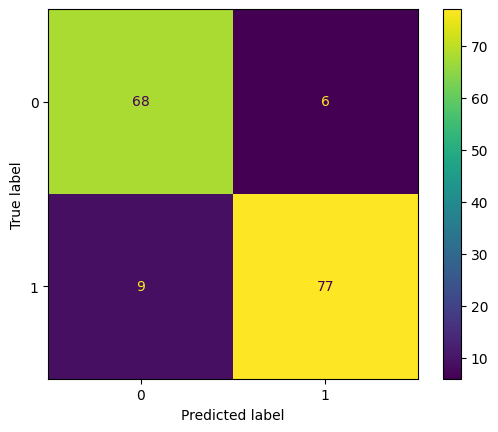

In [28]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('Logistic Regression')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Evaluation of Robustness to Fraud
* The model's robustness to fraud detection can be evaluated based on the precision, recall, and the confusion matrix.
* High Precision (0.97 for Class 1):
Indicates a low number of false positives, meaning most of the positive predictions (fraud cases) are indeed fraud.
* Recall (0.90 for Class 1):
Slightly lower than precision, which indicates that 90% of the actual fraud cases are detected by the model.
* F1 Score (0.93 for Class 1):
The F1 score is the harmonic mean of precision and recall, which provides a balance between the two metrics. The F1 score of 0.93 indicates a good balance between precision and recall for fraud detection.
* Accuracy (0.94): 
The model correctly predicts 94% of the cases in the balanced dataset.
